# Loading Modules and Data

In [1]:
# Loading Essential Libraries
import numpy as np               # For math functions
import pandas as pd              # To work with tables
import seaborn as sns            # To make charts
import matplotlib.pyplot as plt  # To make charts

# Filtering Warnings from Outputs
import warnings
warnings.filterwarnings('ignore')

# Setting the default parameter values
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# path = r"/content/drive/MyDrive/Dissertation Implementation"
# os.chdir(path)

In [3]:
# Reading data
bank_data = pd.read_csv("../data/bank-additional-full.csv", na_values=["unknown"],
                        sep=";")
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Changing Columns names
column_mapping = {
    'age': 'Age',
    'job': 'Job',
    'marital': 'Marital Status',
    'education': 'Education Level',
    'default': 'Credit Default',
    'housing': 'Housing Loan',
    'loan': 'Personal Loan',
    'contact': 'Contact Type',
    'month': 'Last Contact Month',
    'day_of_week': 'Last Contact Day of Week',
    'duration': 'Last Contact Duration',
    'campaign': 'Number of Contacts during Campaign',
    'pdays': 'Days since Last Contact',
    'previous': 'Previous Contacts',
    'poutcome': 'Previous Campaign Outcome',
    'emp.var.rate': 'Employment Variation Rate',
    'cons.price.idx': 'Consumer Price Index',
    'cons.conf.idx': 'Consumer Confidence Index',
    'euribor3m': 'Euribor 3 Month Rate',
    'nr.employed': 'Number of Employees',
    'y': 'Subscribed'
}

# Rename the columns using the dictionary
bank_data.rename(columns=column_mapping, inplace=True)

# Exploratory Data Analysis

In [5]:
# Basic exploration
def execute_eda(df, data_name=""):
    # Displaying basic information
    print(f"Performing EDA on {data_name} Data....")
    print(f"Size: {df.size}")
    print(f"Columns: {df.shape[1]}")
    print(f"Records: {df.shape[0]}")
    print("="*50)

    # Separating the numerical and categorical columns
    categorical_cols = df.select_dtypes("O").columns
    numerical_cols = df.select_dtypes(np.number).columns

    # Displaying the numerical columns
    print("The dataset includes the following numerical columns...")
    for i, j in enumerate(numerical_cols):
        print(f" {i+1}) {j}")

    # Displaying the categorical columns
    print("\n\nThe dataset includes the following categorical columns...")
    for i, j in enumerate(categorical_cols):
        print(f" {i+1}) {j}")

    # Displaying data type and non-null values
    print("="*50)
    print("Data Information....")
    print(df.info())
    print("="*50)

    # Displaying statistical properties
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [6]:
execute_eda(bank_data, "Bank")

Performing EDA on Bank Data....
Size: 864948
Columns: 21
Records: 41188
The dataset includes the following numerical columns...
 1) Age
 2) Last Contact Duration
 3) Number of Contacts during Campaign
 4) Days since Last Contact
 5) Previous Contacts
 6) Employment Variation Rate
 7) Consumer Price Index
 8) Consumer Confidence Index
 9) Euribor 3 Month Rate
 10) Number of Employees


The dataset includes the following categorical columns...
 1) Job
 2) Marital Status
 3) Education Level
 4) Credit Default
 5) Housing Loan
 6) Personal Loan
 7) Contact Type
 8) Last Contact Month
 9) Last Contact Day of Week
 10) Previous Campaign Outcome
 11) Subscribed
Data Information....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 41188 non-null  int64  
 1   Job    

,Age,Job,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day of Week,Last Contact Duration,Number of Contacts during Campaign,Days since Last Contact,Previous Contacts,Previous Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month Rate,Number of Employees,Subscribed
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Univariate Analysis

In [7]:
# Function to annotate bar plot with counts and percentages
def analyze_categorical_feature(df, feature_name, title="", figsize=(16, 5)):
    feature = df[feature_name]

    # Total number of unique values in the feature
    print("Total unique values are:", len(feature.value_counts()), "\n")


    # Frequency of each category in the feature
    data = feature.value_counts()
    print("Category\tValue\n")
    print(data)

    # Plotting bar plot
    sns.set_style('darkgrid')
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(feature_name.capitalize())
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.color_palette("icefire"))

    # Total number of entries in the feature
    total = len(feature)

    # Annotating each bar with the count and percentage
    for p in plot.patches:
        count = p.get_height()
        percentage = '{:.1f}%'.format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        plot.annotate(f'{percentage}', (x, y), size=11, ha='center')

    # Display the plot
    plt.show()

In [8]:
# Function to create bar and pie charts with counts and percentAges
def analyze_categorical_feature_with_multi_charts(df, feature_name, title="", figsize=(16, 5)):
    feature = df[feature_name]

    # Total number of unique values in the feature
    print("Total unique values are:", len(feature.value_counts()), "\n")
    print("Category\tValue\n")

    # Frequency of each category in the feature
    data = feature.value_counts()
    print(data)

    categories_num = len(data)

    # Plotting bar plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=figsize)

    # Bar plot
    plt.subplot(1, 2, 1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.color_palette("icefire"))
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature_name.capitalize(), fontsize=12)

    total = len(feature)

    # Annotating each bar with the count and percentAge
    for p in plot.patches:
        count = p.get_height()
        percentAge = '{:.1f}%'.format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        plot.annotate(f'{percentAge}', (x, y), size=11, ha='center')

    # Pie chart
    plt.subplot(1, 2, 2)
    labels = data.index
    plt.pie(x=data, autopct=lambda p: f'{p:.1f}%', explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)

    # Display the plots
    plt.show()

Total unique values are: 11 

Category	Value

Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


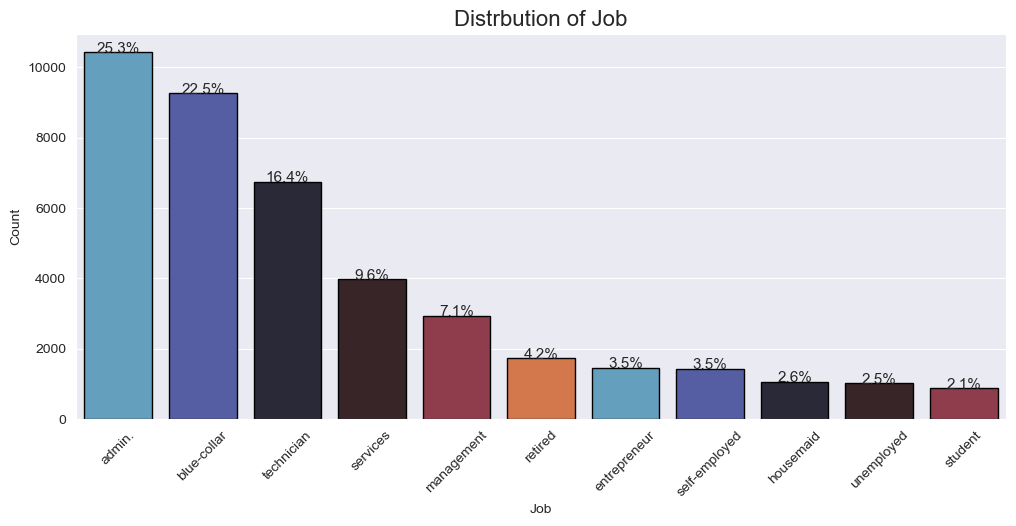

In [9]:
analyze_categorical_feature(bank_data, "Job", "Distrbution of Job", figsize=(12, 5))

Total unique values are: 3 

Category	Value

Marital Status
married     24928
single      11568
divorced     4612
Name: count, dtype: int64


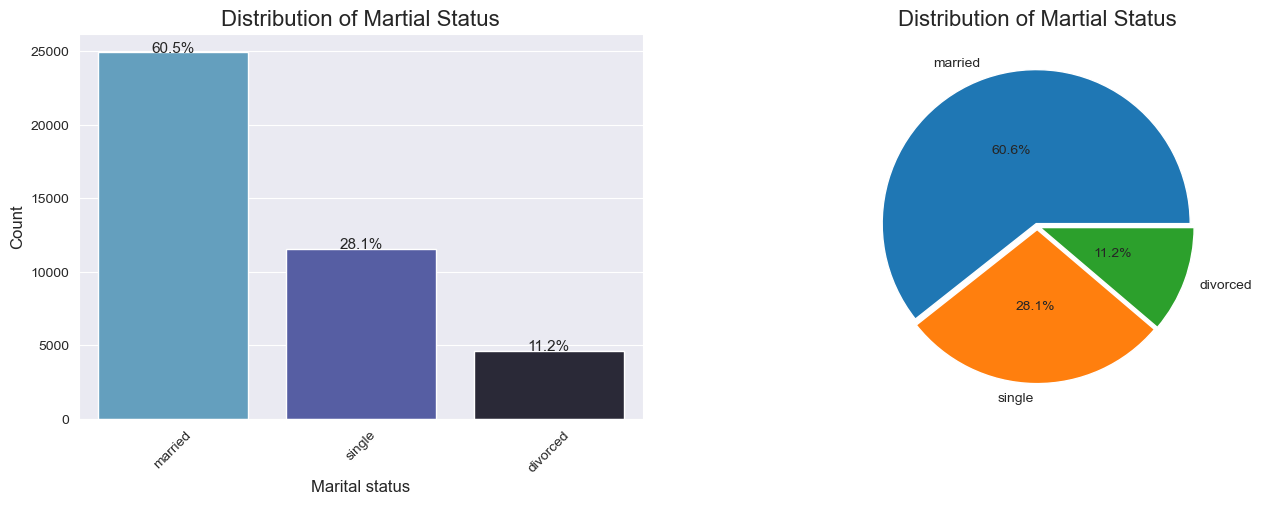

In [10]:
analyze_categorical_feature_with_multi_charts(bank_data, "Marital Status", "Distribution of Martial Status")

Total unique values are: 7 

Category	Value

Education Level
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


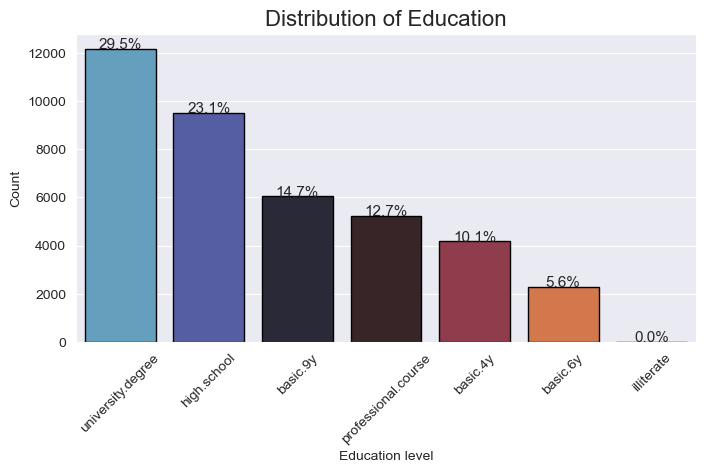

In [11]:
analyze_categorical_feature(bank_data, "Education Level", "Distribution of Education", figsize=(8, 4))

Total unique values are: 2 

Category	Value

Credit Default
no     32588
yes        3
Name: count, dtype: int64


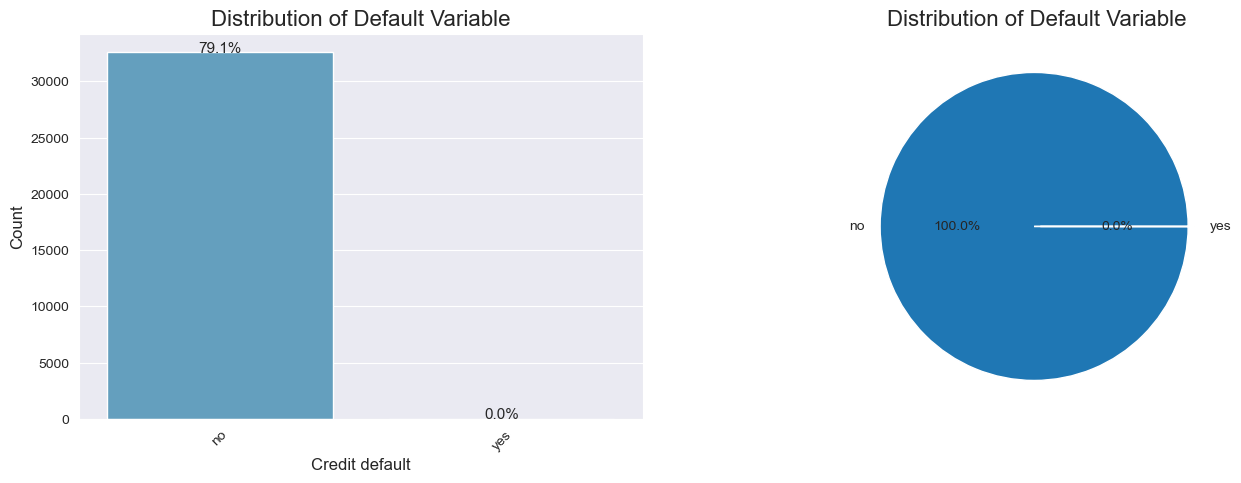

In [12]:
analyze_categorical_feature_with_multi_charts(bank_data, "Credit Default", "Distribution of Default Variable")

Total unique values are: 2 

Category	Value

Housing Loan
yes    21576
no     18622
Name: count, dtype: int64


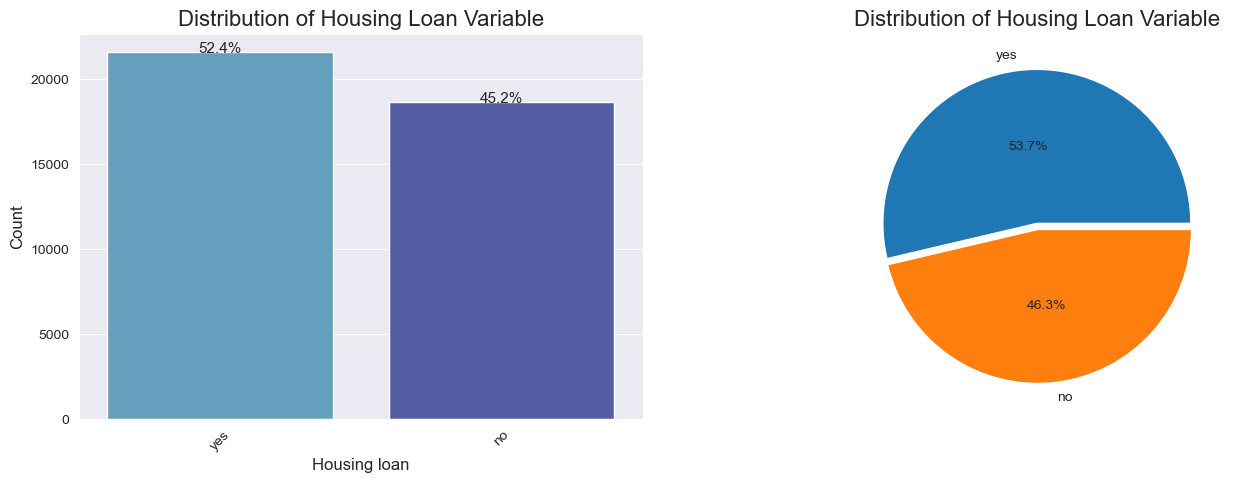

In [13]:
analyze_categorical_feature_with_multi_charts(bank_data, "Housing Loan", "Distribution of Housing Loan Variable")

Total unique values are: 2 

Category	Value

Personal Loan
no     33950
yes     6248
Name: count, dtype: int64


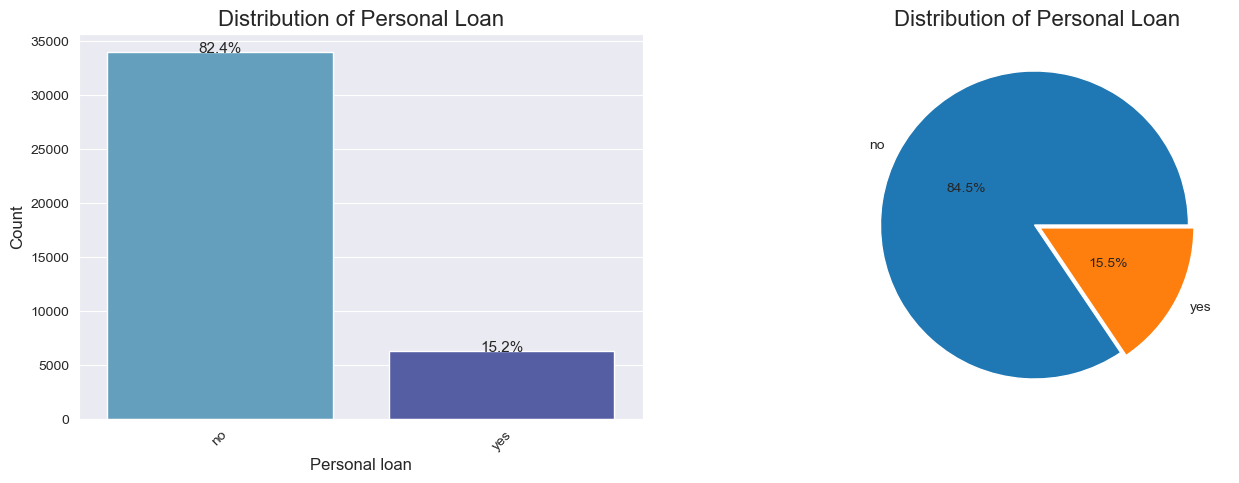

In [14]:
analyze_categorical_feature_with_multi_charts(bank_data, "Personal Loan", "Distribution of Personal Loan")

Total unique values are: 2 

Category	Value

Contact Type
cellular     26144
telephone    15044
Name: count, dtype: int64


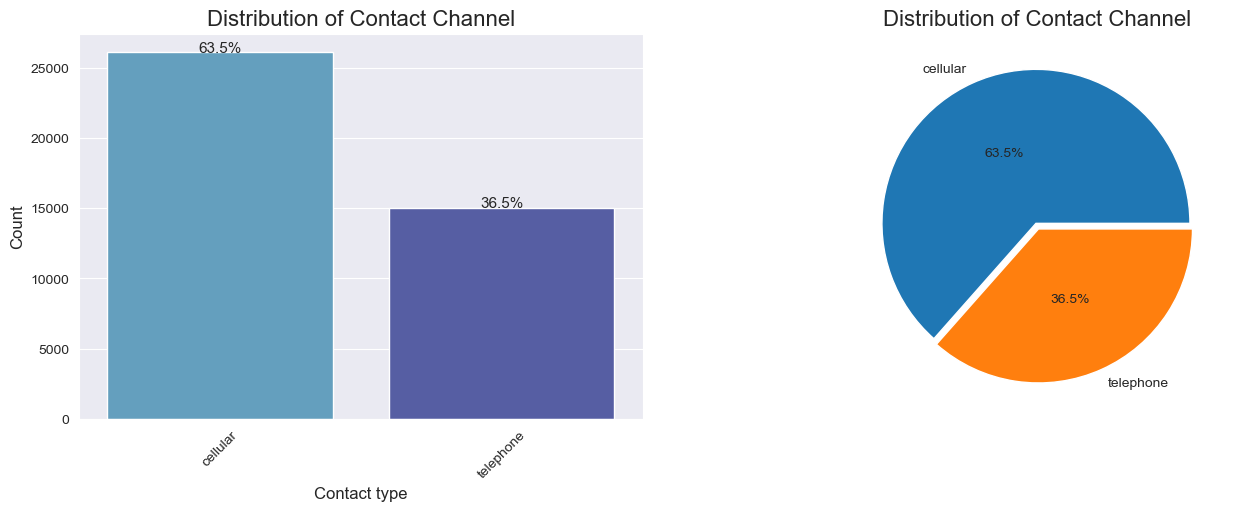

In [15]:
analyze_categorical_feature_with_multi_charts(bank_data, "Contact Type", "Distribution of Contact Channel")

Total unique values are: 2 

Category	Value

Subscribed
no     36548
yes     4640
Name: count, dtype: int64


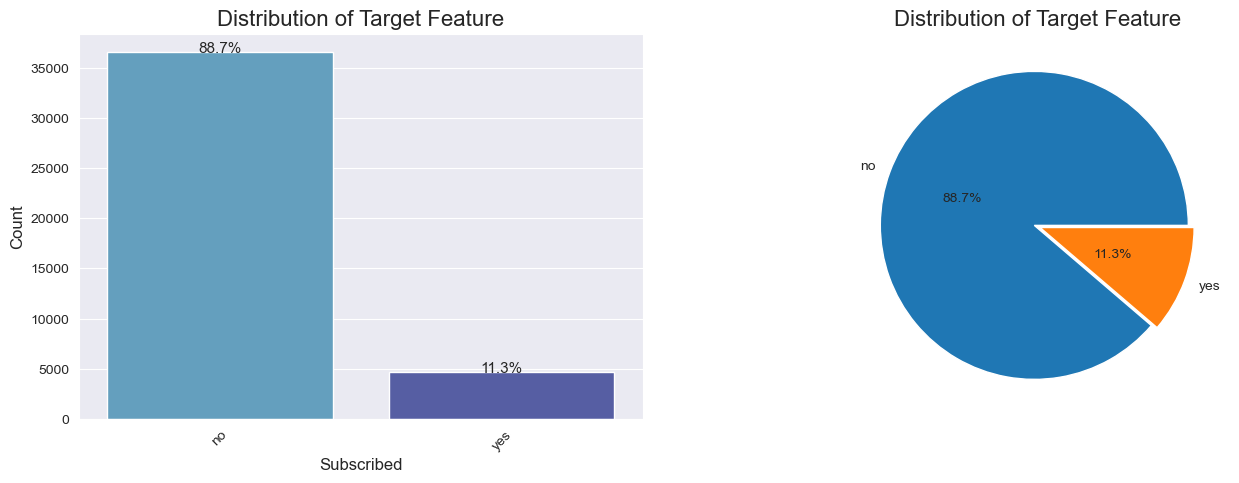

In [16]:
analyze_categorical_feature_with_multi_charts(bank_data, "Subscribed", "Distribution of Target Feature")

**Distribution of Job**

 - **Admin:** The majority of clients fall into the 'admin.' category, making up 25.3% of the total, with over 10,000 instances.
 - **Blue-Collar:** The second most common job category, accounting for 22.5% with around 9,000 instances.
 - **Technician:** Represents 16.4% of the dataset with approximately 7,000 instances.
 - Other job categories such as services, manAgement, and retired have lower representations, with 'unknown' being the least common at 0.8%.

**Distribution of Marital Status**

 - **Married:** The dominant marital status, with 60.5% of clients being married, totaling around 25,000 instances.
 - **Single:** Accounts for 28.1% of the dataset with about 11,000 instances.
 - **Divorced:** Comprises 11.2% with approximately 4,500 instances.
 - **Unknown:** A negligible proportion at 0.2%.
 - The pie chart corroborates these findings, visually representing the percentAges and counts for each marital status.

**Distribution of Education Level**

 - **University Degree:** The highest educational level, making up 29.5% with over 12,000 instances.
 - **High School:** The second most common education level at 23.1%, approximately 9,000 instances.
 - Other education levels such as basic.9y, professional.course, and basic.4y show decreasing proportions, with 'illiterate' being virtually nonexistent.

**Distribution of Credit Default**

 - **No Default:** The majority of clients have no credit in default, comprising 79.1% with over 30,000 instances.
 - **Unknown:** Represents 20.9% of the dataset.
 - **Yes Default:** Negligible or non-existent in this dataset.
 - The pie chart further highlights the predominance of clients without default.

**Distribution of Housing Loan**

 - **Yes Housing Loan:** The majority have a housing loan, making up 52.4% with over 20,000 instances.
 - **No Housing Loan:** Accounts for 45.2%, approximately 18,000 instances.
 - **Unknown:** A small percentAge at 2.4%.
 - The pie chart visually confirms these percentAges and counts.

**Distribution of Personal Loan**
 - **No Personal Loan:** The majority of clients, 82.4%, do not have a personal loan. This group constitutes about 35,000 instances.
 - **Yes Personal Loan:** 15.2% of clients have a personal loan, totaling around 6,800 instances.
 - **Unknown:** A small percentAge of 2.4% falls under the 'unknown' category.
 - The pie chart visually confirms these proportions, indicating that a significant majority of clients do not have a personal loan.

**Distribution of Contact Type**
 - **Cellular:** The majority of contacts were made via cellular, accounting for 63.5% with around 26,000 instances.
 - **Telephone:** 36.5% of contacts were made via telephone, approximately 15,000 instances.
 - The pie chart corroborates these findings, highlighting the predominance of cellular contacts over telephone contacts.

**Distribution of Subscribed Feature**

 - **No Subscription:** The majority of clients did not subscribe to the term deposit, making up 88.7% with over 35,000 instances.
 - **Yes Subscription:** Only 11.3% of clients accepted the offere and subscribed the offer presented by the bank.
 - The pie chart highlights this disparity, showing the vast majority of 'no' responses.
 - This is the target feature that I have to use for prediction, but there is a problem that data is imbalanced between 2 classes. So before using it I have to make it balanced.

# Bivariate Analysis

In [17]:
# Fucntion to select
def select_colormap():
    # Selecting a random colormap for the plot
    colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
                  'coolwarm', 'afmhot', 'gist_heat', 'hot', 'copper',
                  'jet', 'rainbow', 'seismic', 'twilight', 'twilight_shifted']
    random_index = np.random.randint(0, len(colormaps))
    selected_colormap = colormaps[random_index]

    if selected_colormap:
        return selected_colormap
    else:
        select_colormap()

In [18]:
def analyze_categorical_relationhips(feature, data=bank_data, num_top_categories=5):
    target = "Subscribed"
    target_outcome = "yes"

    selected_colormap = select_colormap()

    # Computing the ratio of the target outcome for each category
    category_ratios = {}
    for category in data[feature].unique():
        numerator = data[(data["Subscribed"] == target_outcome) & (data[feature] == category)]
        denominator = data[(data[feature] == category)]
        try:
            ratio = 100 * (len(numerator) / len(denominator))
        except ZeroDivisionError:
            ratio = 0
        category_ratios[category] = ratio

    # Sorting categories based on their ratios
    sorted_ratios = dict(sorted(category_ratios.items(), reverse=True, key=lambda item: item[1]))

    # Converting the sorted ratios to a DataFrame for plotting
    ratio_df = pd.DataFrame(list(sorted_ratios.items()), columns=[feature, 'Ratio'])

    # Plotting the ratios as a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Ratio', data=ratio_df, palette=selected_colormap)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Acceptance Rate (%)')
    plt.title(f'Offer Acceptance Rate by {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylim(ratio_df.Ratio.min()-0.5, ratio_df.Ratio.max()+0.5)
    plt.show()

    # Printing the top categories with their ratios
    for category, ratio in sorted_ratios.items():
        if num_top_categories > 0:
            print(f"Offer Acceptance Rate for category {str(category).upper()} in feature {str(feature).upper()} is {ratio:.2f}%")
            num_top_categories -= 1
        else:
            break

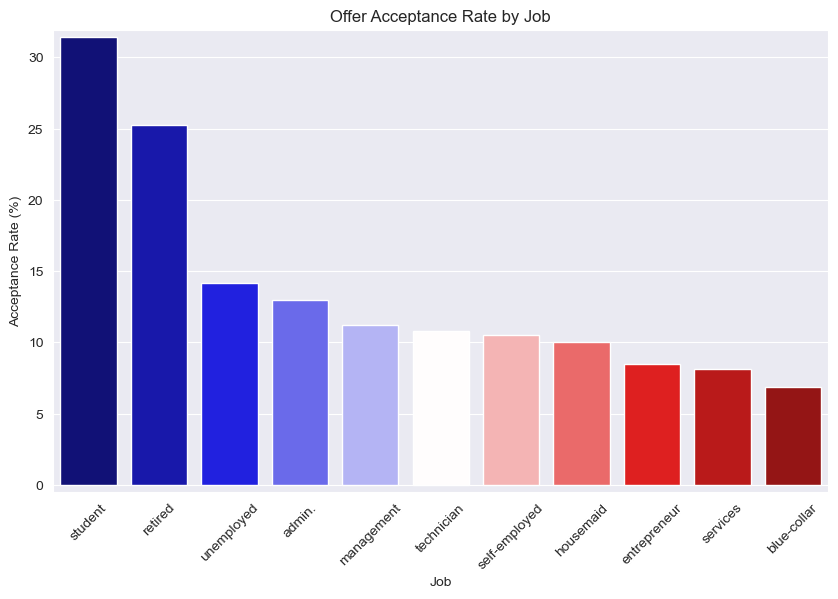

Offer Acceptance Rate for category STUDENT in feature JOB is 31.43%
Offer Acceptance Rate for category RETIRED in feature JOB is 25.23%
Offer Acceptance Rate for category UNEMPLOYED in feature JOB is 14.20%
Offer Acceptance Rate for category ADMIN. in feature JOB is 12.97%
Offer Acceptance Rate for category MANAGEMENT in feature JOB is 11.22%


In [19]:
analyze_categorical_relationhips("Job")

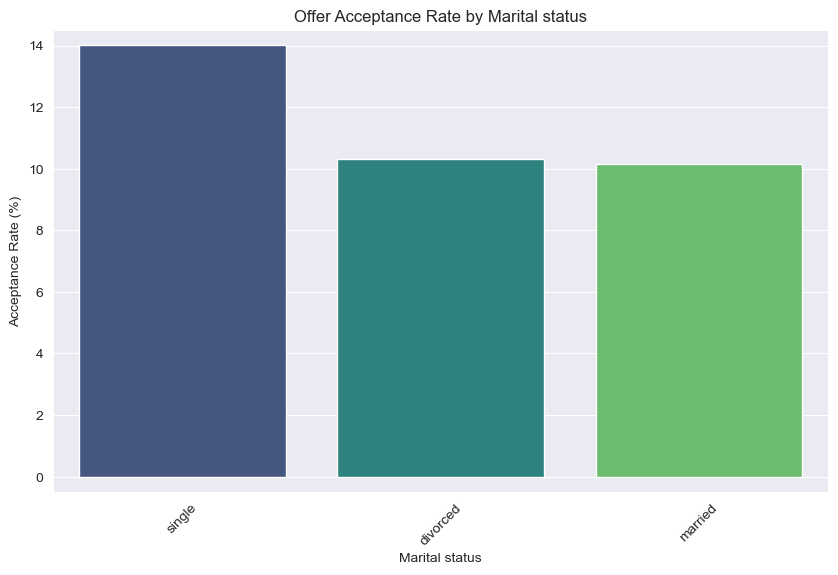

Offer Acceptance Rate for category SINGLE in feature MARITAL STATUS is 14.00%
Offer Acceptance Rate for category DIVORCED in feature MARITAL STATUS is 10.32%
Offer Acceptance Rate for category MARRIED in feature MARITAL STATUS is 10.16%
Offer Acceptance Rate for category NAN in feature MARITAL STATUS is 0.00%


In [20]:
analyze_categorical_relationhips("Marital Status")

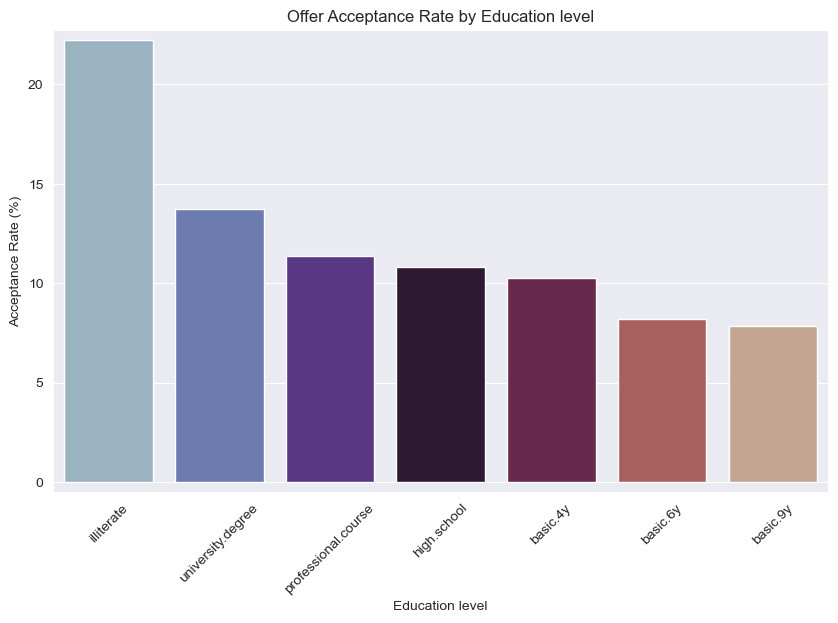

Offer Acceptance Rate for category ILLITERATE in feature EDUCATION LEVEL is 22.22%
Offer Acceptance Rate for category UNIVERSITY.DEGREE in feature EDUCATION LEVEL is 13.72%
Offer Acceptance Rate for category PROFESSIONAL.COURSE in feature EDUCATION LEVEL is 11.35%
Offer Acceptance Rate for category HIGH.SCHOOL in feature EDUCATION LEVEL is 10.84%
Offer Acceptance Rate for category BASIC.4Y in feature EDUCATION LEVEL is 10.25%


In [21]:
analyze_categorical_relationhips("Education Level")

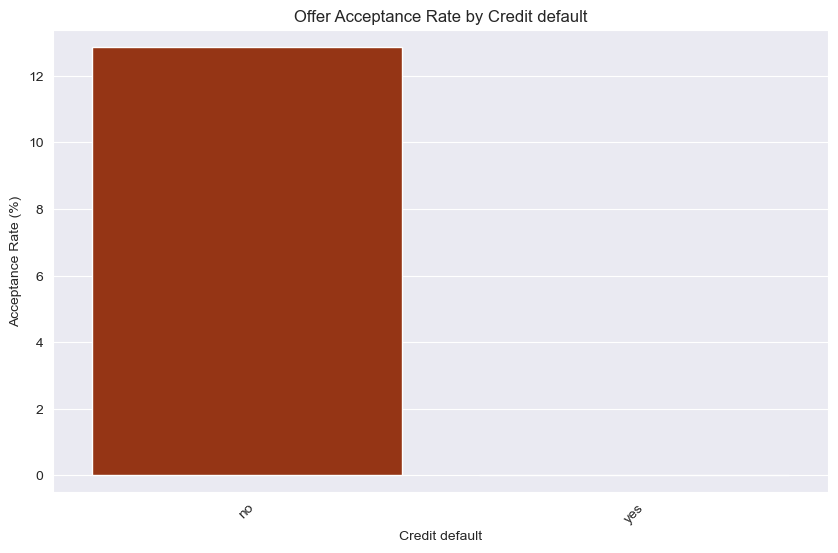

Offer Acceptance Rate for category NO in feature CREDIT DEFAULT is 12.88%
Offer Acceptance Rate for category NAN in feature CREDIT DEFAULT is 0.00%
Offer Acceptance Rate for category YES in feature CREDIT DEFAULT is 0.00%


In [22]:
analyze_categorical_relationhips("Credit Default")

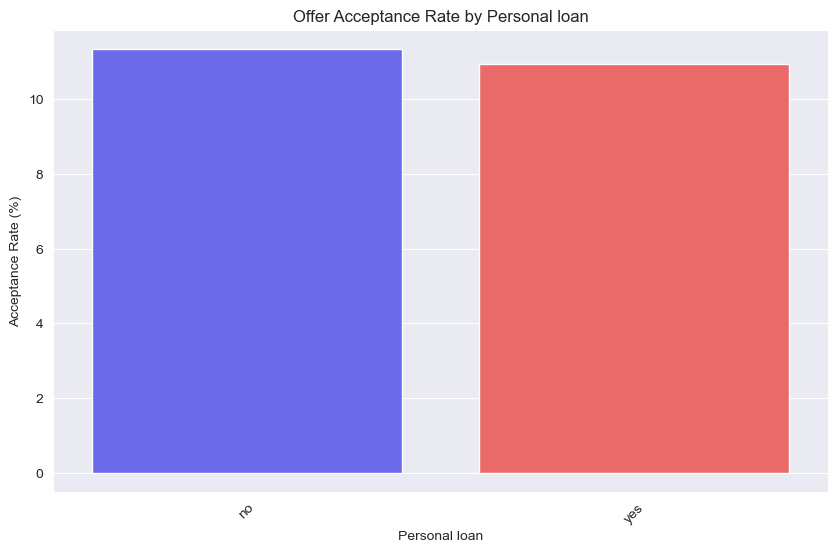

Offer Acceptance Rate for category NO in feature PERSONAL LOAN is 11.34%
Offer Acceptance Rate for category YES in feature PERSONAL LOAN is 10.93%
Offer Acceptance Rate for category NAN in feature PERSONAL LOAN is 0.00%


In [24]:
analyze_categorical_relationhips("Personal Loan")

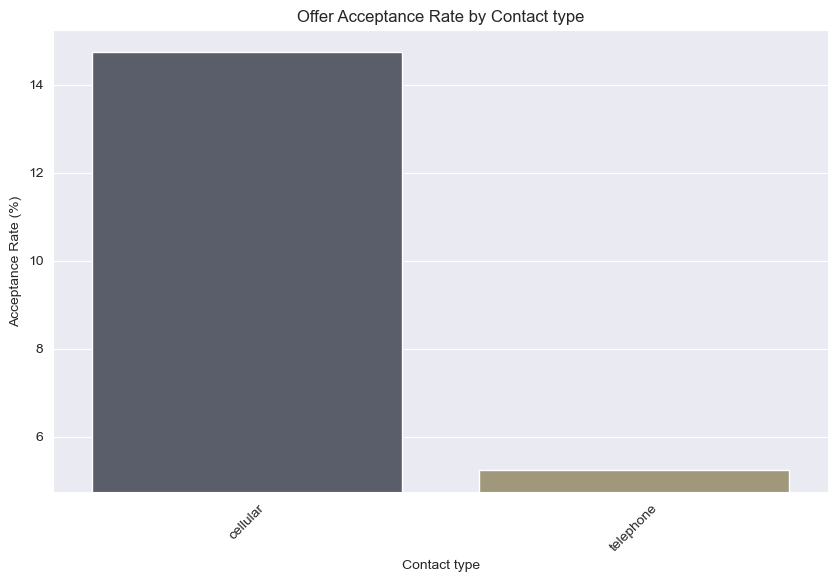

Offer Acceptance Rate for category CELLULAR in feature CONTACT TYPE is 14.74%
Offer Acceptance Rate for category TELEPHONE in feature CONTACT TYPE is 5.23%


In [25]:
analyze_categorical_relationhips("Contact Type")

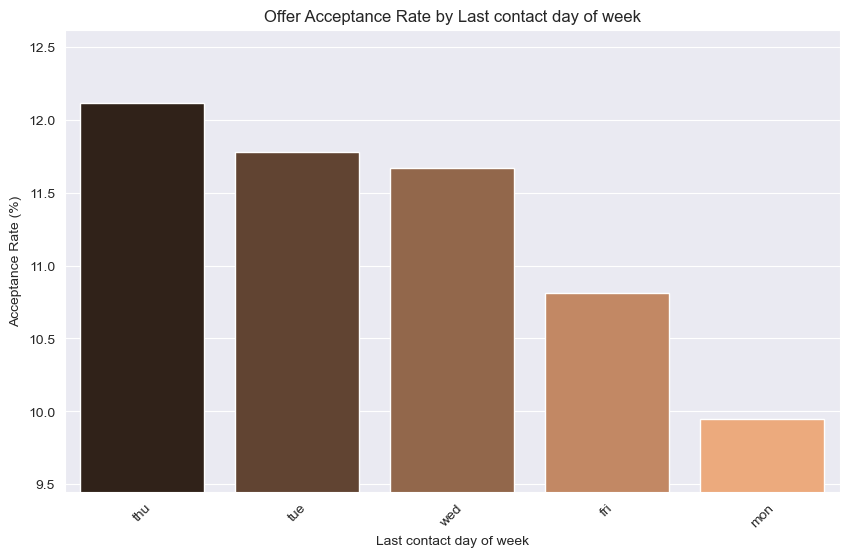

Offer Acceptance Rate for category THU in feature LAST CONTACT DAY OF WEEK is 12.12%
Offer Acceptance Rate for category TUE in feature LAST CONTACT DAY OF WEEK is 11.78%
Offer Acceptance Rate for category WED in feature LAST CONTACT DAY OF WEEK is 11.67%
Offer Acceptance Rate for category FRI in feature LAST CONTACT DAY OF WEEK is 10.81%
Offer Acceptance Rate for category MON in feature LAST CONTACT DAY OF WEEK is 9.95%


In [26]:
analyze_categorical_relationhips("Last Contact Day of Week")

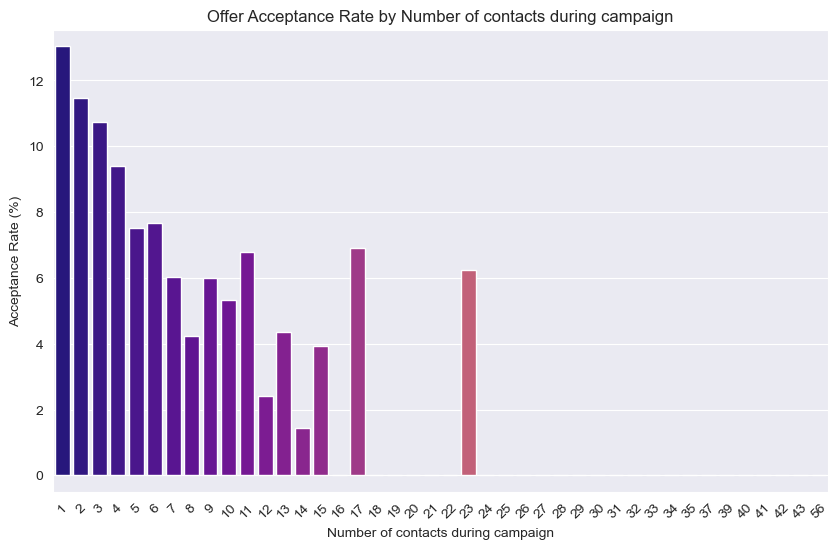

Offer Acceptance Rate for category 1 in feature NUMBER OF CONTACTS DURING CAMPAIGN is 13.04%
Offer Acceptance Rate for category 2 in feature NUMBER OF CONTACTS DURING CAMPAIGN is 11.46%
Offer Acceptance Rate for category 3 in feature NUMBER OF CONTACTS DURING CAMPAIGN is 10.75%
Offer Acceptance Rate for category 4 in feature NUMBER OF CONTACTS DURING CAMPAIGN is 9.39%
Offer Acceptance Rate for category 6 in feature NUMBER OF CONTACTS DURING CAMPAIGN is 7.66%


In [27]:
analyze_categorical_relationhips("Number of Contacts during Campaign")

**Offer Acceptance Rate by Job**

- **Student:** The highest acceptance rate, with 31.43%, indicating students are more likely to accept offers.
- **Retired:** Second highest with 25.23%, showing a high acceptance among retired individuals.
- **Unemployed:** 14.20%, also showing a notable acceptance rate.
- **Admin:** 12.97%, indicating administrative workers have a moderate acceptance rate.
- **Management:** 11.22%, showing a lower but significant acceptance rate among management roles.

**Offer Acceptance Rate by Marital Status**

- **Unknown:** Highest acceptance rate at 15.00%.
- **Single:** 14.00%, showing higher acceptance among single clients.
- **Divorced:** 10.32%, indicating moderate acceptance.
- **Married:** 10.16%, showing the lowest acceptance rate among the categories.

**Offer Acceptance Rate by Education Level**

- **Illiterate:** Highest acceptance rate at 22.22%.
- **Unknown:** 14.50%, indicating significant acceptance despite the unknown education level.
- **University Degree:** 13.72%, showing higher acceptance among clients with higher education.
- **Professional Course:** 11.35%, indicating a moderate acceptance rate.
- **High School:** 10.84%, showing a lower acceptance rate among high school graduates.

**Offer Acceptance Rate by Credit Default**

- **No:** Highest acceptance rate at 12.88%, indicating clients without credit default are more likely to accept offers.
- **Unknown:** 5.15%, showing lower acceptance.
- **Yes:** 0.00%, indicating no acceptance among clients with credit defaults.

**Offer Acceptance Rate by Housing Loan**

- **Yes:** Higher acceptance rate at 11.62%, indicating clients with housing loans are more likely to accept offers.
- **No:** 10.88%, showing moderate acceptance.
- **Unknown:** 10.81%, indicating a similar acceptance rate to those without housing loans.

**Offer Acceptance Rate by Personal Loan**

- **No:** Higher acceptance rate at 11.34%, indicating clients without personal loans are more likely to accept offers.
- **Yes:** 10.93%, showing slightly lower acceptance.
- **Unknown:** 10.81%, indicating similar acceptance to those with personal loans.

**Offer Acceptance Rate by Contact Type**

- **Cellular:** Highest acceptance rate at 14.74%, indicating clients contacted via cellular are more likely to accept offers.
- **Telephone:** Lower acceptance rate at 5.23%.

**Offer Acceptance Rate by Last Contact Day of Week**

- **Thu:** Highest acceptance rate at 12.12%.
- **Tue:** 11.78%, indicating higher acceptance on Tuesdays.
- **Wed:** 11.67%, showing moderate acceptance.
- **Fri:** 10.81%, lower acceptance on Fridays.
- **Mon:** 9.95%, indicating the lowest acceptance on Mondays.

**Offer Acceptance Rate by Number of Contacts during Campaign**

- **1 Contact:** Highest acceptance rate at 13.04%, indicating higher acceptance with fewer contacts.
- **2 Contacts:** 11.46%, showing a slight decrease in acceptance with more contacts.
- **3 Contacts:** 10.75%, indicating moderate acceptance.
- **4 Contacts:** 9.39%, showing lower acceptance with more contacts.
- **6 Contacts:** 7.66%, indicating further decrease in acceptance.

### Summary:
- **Job:** Students and retired individuals have the highest acceptance rates, while blue-collar workers have the lowest.
- **Marital Status:** Unknown marital status and single clients show higher acceptance rates.
- **Education Level:** Illiterate clients have the highest acceptance rates, while clients with basic education have lower acceptance.
- **Credit Default:** Clients without credit defaults are more likely to accept offers.
- **Housing Loan and Personal Loan:** Clients with housing loans and without personal loans show higher acceptance rates.
- **Contact Type:** Cellular contacts have a significantly higher acceptance rate compared to telephone contacts.
- **Last Contact Day of Week:** Thursdays and Tuesdays show higher acceptance rates.
- **Number of Contacts:** Acceptance rates decrease as the number of contacts during the campaign increases.


# Data Preprocessing

## Null Values

In [28]:
# Check if any entry is null
bank_data.isnull().sum()

Age                                      0
Job                                    330
Marital Status                          80
Education Level                       1731
Credit Default                        8597
Housing Loan                           990
Personal Loan                          990
Contact Type                             0
Last Contact Month                       0
Last Contact Day of Week                 0
Last Contact Duration                    0
Number of Contacts during Campaign       0
Days since Last Contact                  0
Previous Contacts                        0
Previous Campaign Outcome                0
Employment Variation Rate                0
Consumer Price Index                     0
Consumer Confidence Index                0
Euribor 3 Month Rate                     0
Number of Employees                      0
Subscribed                               0
dtype: int64

In [29]:
# Fill NaN in numerical columns with mean
numerical_cols = bank_data.select_dtypes(include=['float', 'int']).columns
bank_data[numerical_cols] = bank_data[numerical_cols].fillna(bank_data[numerical_cols].mean())

# Fill NaN in categorical columns with mode
categorical_cols = bank_data.select_dtypes(include=['object']).columns
bank_data[categorical_cols] = bank_data[categorical_cols].fillna(bank_data[categorical_cols].mode().iloc[0])

In [30]:
bank_data.isnull().sum()

Age                                   0
Job                                   0
Marital Status                        0
Education Level                       0
Credit Default                        0
Housing Loan                          0
Personal Loan                         0
Contact Type                          0
Last Contact Month                    0
Last Contact Day of Week              0
Last Contact Duration                 0
Number of Contacts during Campaign    0
Days since Last Contact               0
Previous Contacts                     0
Previous Campaign Outcome             0
Employment Variation Rate             0
Consumer Price Index                  0
Consumer Confidence Index             0
Euribor 3 Month Rate                  0
Number of Employees                   0
Subscribed                            0
dtype: int64

#### Outliers

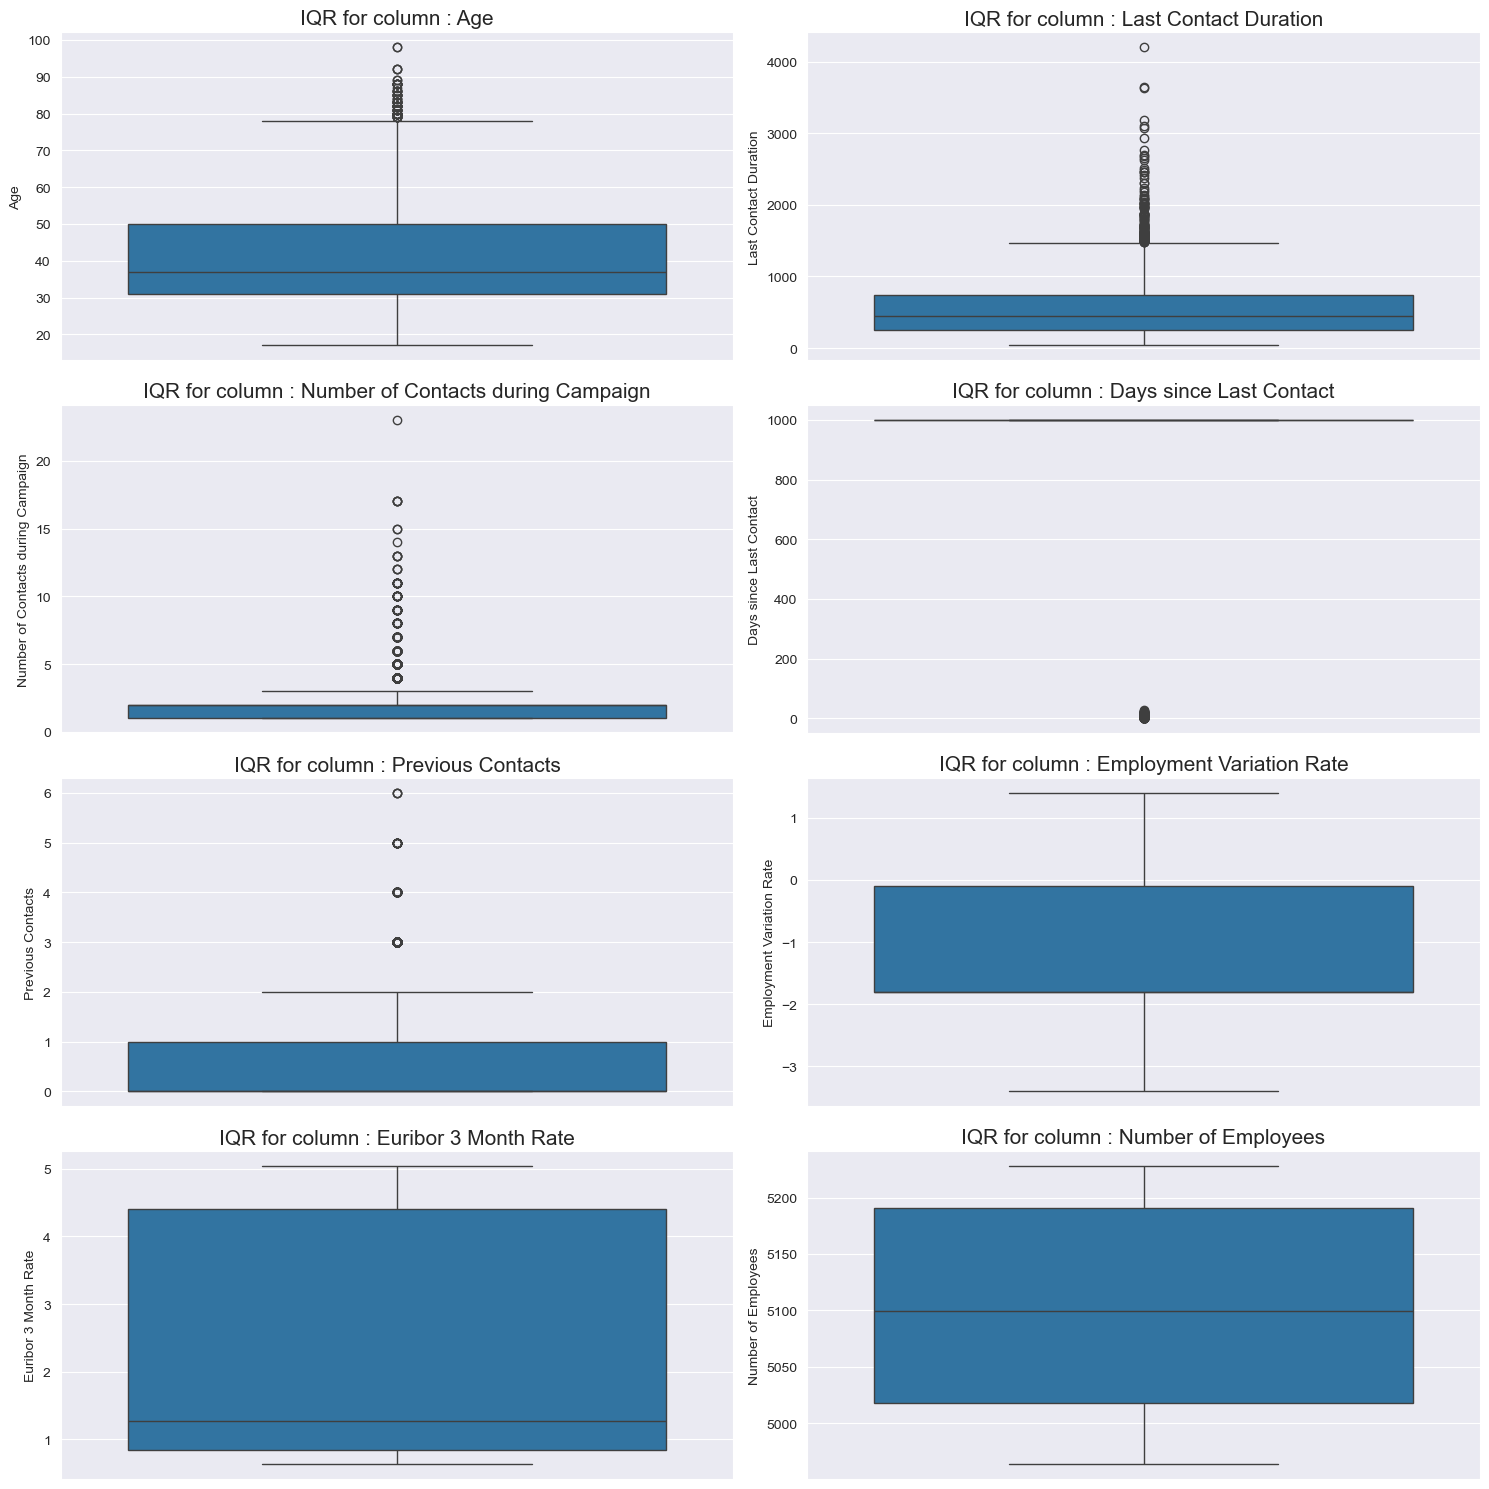

In [31]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = [15,15])
num_cols = ['Age', 'Last Contact Duration', 'Number of Contacts during Campaign',
       'Days since Last Contact', 'Previous Contacts',
       'Employment Variation Rate', 'Euribor 3 Month Rate',
       'Number of Employees']
cnt = 1
bank_data_yes = bank_data[bank_data.Subscribed=="yes"]
for col in num_cols:
    ax = plt.subplot(4,2,cnt)
    sns.boxplot(bank_data_yes[col])
    cnt+=1
    plot_name = "IQR for column : "+col
    ax.set_title(plot_name,fontsize = 15)
plt.tight_layout()
plt.show()

In [35]:
outlier_index = bank_data[(
    (bank_data.Subscribed=="yes") & 
    (bank_data.Age > 85) | 
    (bank_data["Days since Last Contact"] > 2000) | 
    (bank_data['Number of Contacts during Campaign'] > 10) | 
    (bank_data['Previous Contacts'] > 3))].index


bank_data.drop(outlier_index, axis=0, inplace=True)
print(f"{len(outlier_index)} outliers has been removed.")

983 outliers has been removed.


### Converting binary variables (Yes/No) to 0/1

In [36]:
# Variables to be transformed into binary format
binary_variables = ['Credit Default', 'Housing Loan', 'Personal Loan', "Subscribed"]

# Function to map "yes" to 1 and "no" to 0
def map_to_binary(variable):
    return variable.map({'yes': 1, 'no': 0})

# Applying the function to the binary_variables list
bank_data[binary_variables] = bank_data[binary_variables].apply(map_to_binary)

### Converting month to numerical column

In [37]:
# Function to convert month abbreviations to their corresponding numbers
def convert_month_to_number(month_abbr):
    month_abbreviations = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return month_abbreviations.index(month_abbr) + 1

# Applying the function to the 'month' column of the bank_data DataFrame
bank_data['Last Contact Month'] = bank_data['Last Contact Month'].apply(convert_month_to_number)

### Feature Correlation

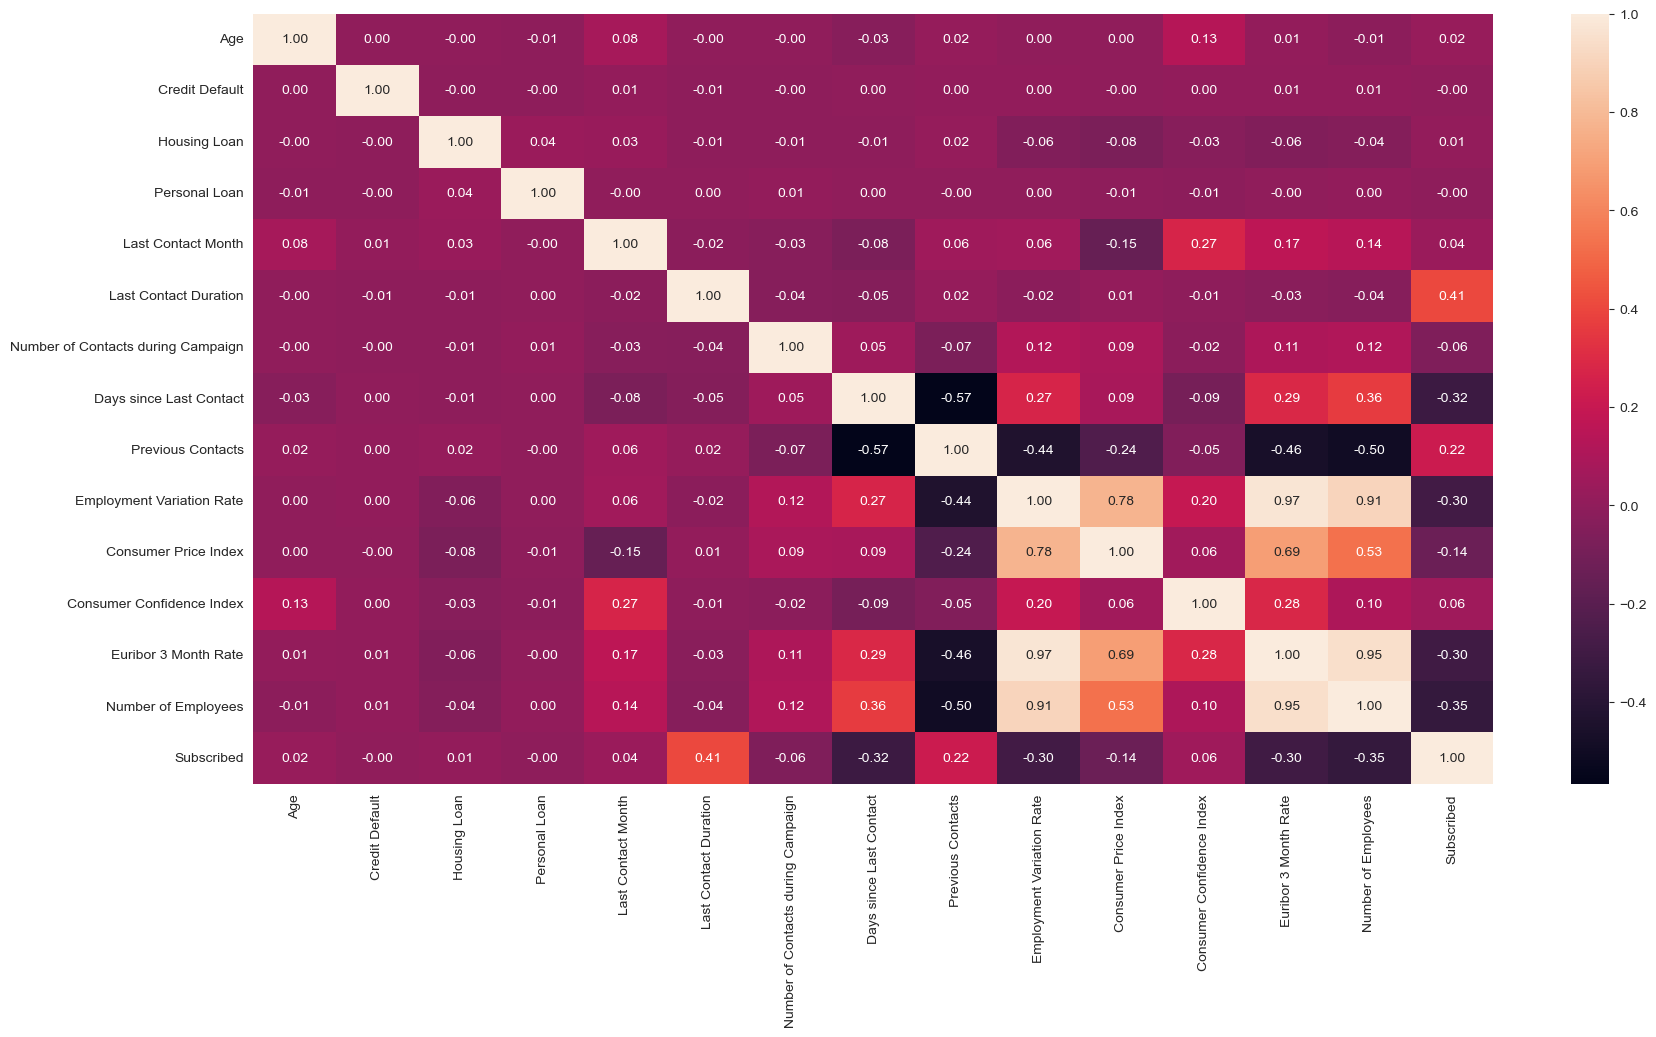

In [38]:
# correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(bank_data.select_dtypes(np.number).corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0)
plt.show()

### Feature Encoding

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(bank_data[["Job", "Last Contact Day of Week",  'Marital Status', 'Education Level', 'Last Contact Day of Week', 'Contact Type', 'Previous Campaign Outcome']], drop_first=True)

# Adding the results to the master dataframe
bank_data = pd.concat([bank_data, dummy], axis=1)

In [ ]:
# We have created dummies for the below variables, so we can drop them
bank_data = bank_data.drop(["Job", "Last Contact Day of Week", 'Marital Status', 'Education Level', 'Contact Type', 'Previous Campaign Outcome'], axis=1)

bank_data.shape